## Titanic Survival Prediction
#### By: Hana Amalia Kushandini

The purpose of this project is to predict whether the passengers of Titanic would survive or not. There are 12 columns in the data, and one of the columns is a target or label that indicates 1 if the passengers survived and 0 if the passengers didn't survive. The other 11 columns are independent variables that affect the target data.

**Data Source:** https://www.kaggle.com/competitions/titanic/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import random

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Data Dictionary:**
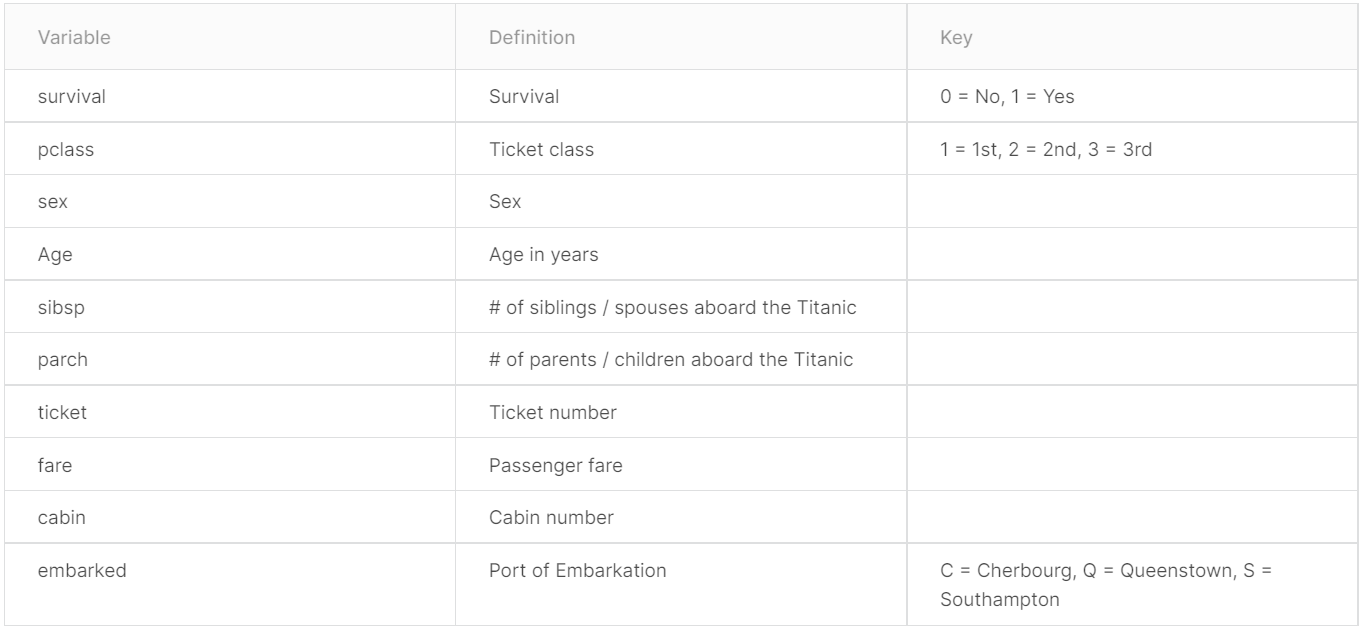

### Exploratory Data Analysis

[Text(0, 0, '549'), Text(0, 0, '342')]

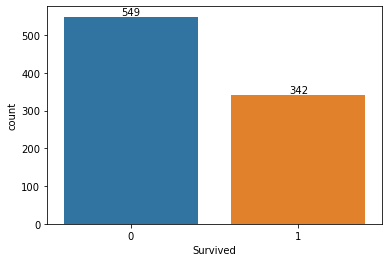

In [6]:
ax = sns.countplot(df["Survived"])
ax.bar_label(ax.containers[0], label_type='edge')

In [7]:
total = df.groupby("Survived").count()["PassengerId"]
perc = total/df.shape[0]*100
survived_data = pd.concat([total, perc], axis=1, keys=['Total', '%']).reset_index()
survived_data

,Survived,Total,%
0,0,549,61.616162
1,1,342,38.383838


In [8]:
num = ["Age", "Fare"]
cat = ["Pclass", "Sex", "Embarked", "SibSp", "Parch"]

In [9]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


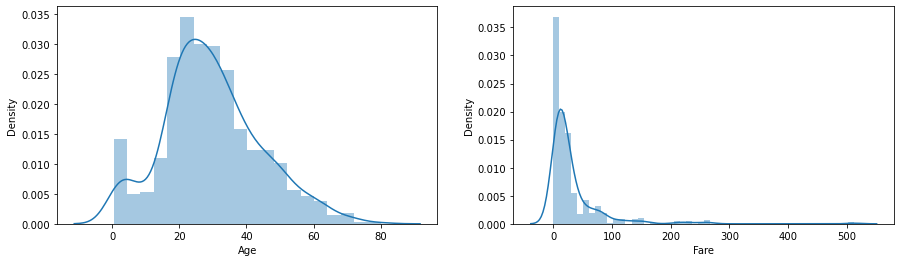

In [10]:
plt.figure(figsize=(15, 4))
for i in range(0, len(num)):
    plt.subplot(1, 2, i+1)
    sns.distplot(df[num[i]])

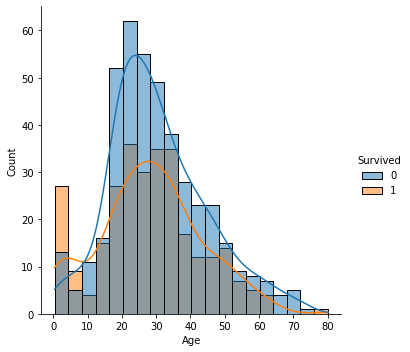

In [11]:
sns.displot(data=df, x="Age", hue=df["Survived"], kde=True)

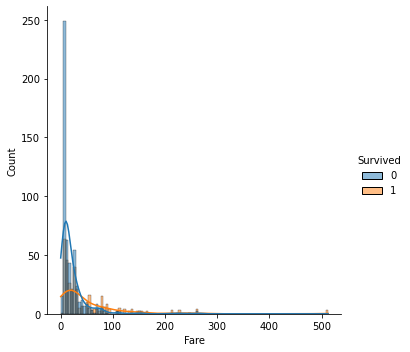

In [12]:
sns.displot(data=df, x="Fare", hue=df["Survived"], kde=True)

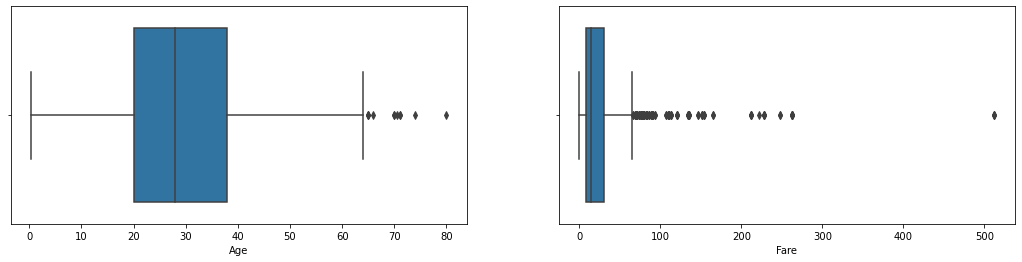

In [13]:
plt.figure(figsize=(18, 4))
for i in range(0, len(num)):
    plt.subplot(1, 2, i+1)
    sns.boxplot(df[num[i]])

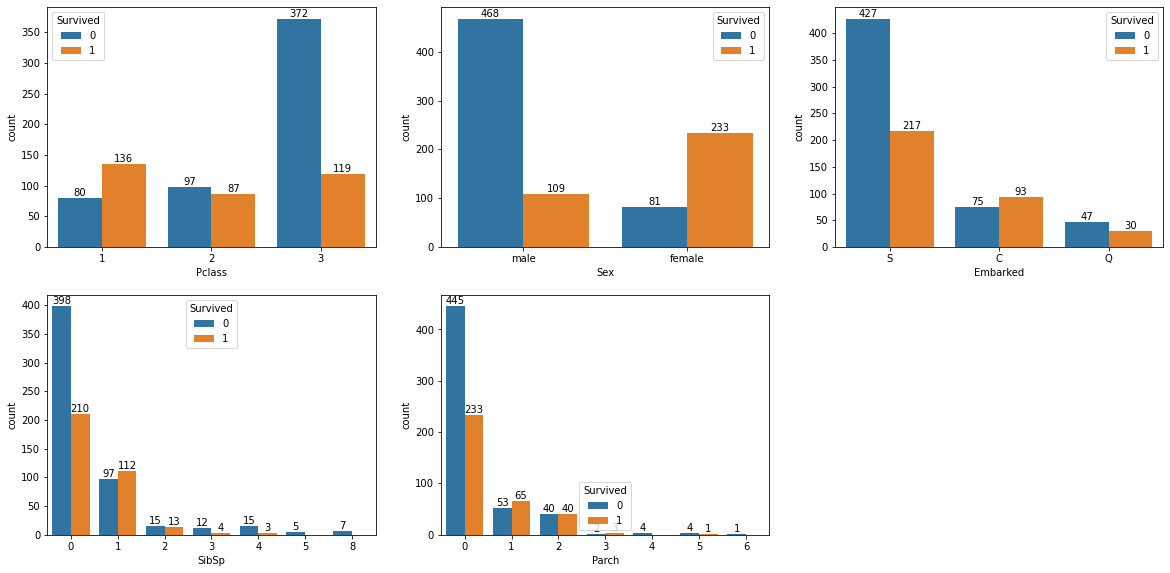

In [14]:
plt.figure(figsize=(20, 15))
for i in range(0, len(cat)):
    plt.subplot(3, 3, i+1)
    ax=sns.countplot(df[cat[i]], hue=df["Survived"])
    ax.bar_label(ax.containers[0], label_type='edge')
    ax.bar_label(ax.containers[1], label_type='edge')

<AxesSubplot:>

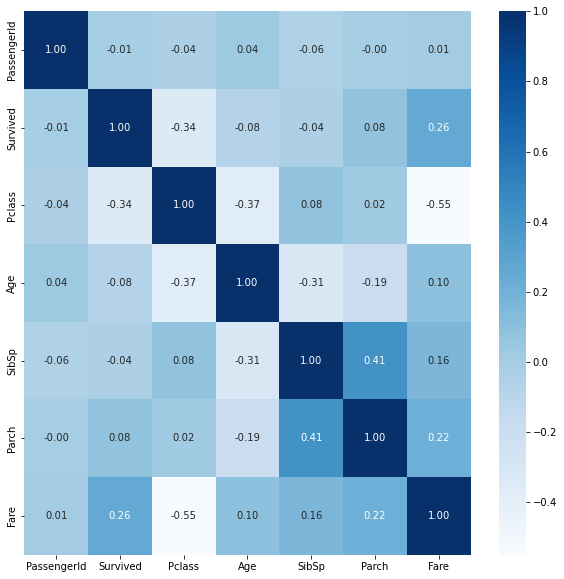

In [15]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

**Key Takeaways:**
* Of all the passengers in the data, around 38.4% of them survived, but the rest didn't survive.
* The average age of all passengers based on the data is 29.7, and the average fare is 32.2.
* The distribution of passenger's age follows a normal distribution, and the distribution of passenger's fare is a positive skew distribution.
* There are several outliers in age and fare columns.
* Passengers in 1st class had bigger chance of surviving, while the passengers in 3rd class had a small chance of surviving.
* There were 468 male passengers that didn't survive, and only 109 survived. As for female passengers, there were 233 passengers survived and 81 didn't survive. It can be said that male passengers had a small chance to be survived compared to female passengers.
* Passengers that embarked on their trip from Southampton had a high rate of not surviving.

### Feature Engineering

**Reference:** https://www.kaggle.com/code/gunesevitan/titanic-advanced-feature-engineering-tutorial

##### Family Size

SibSp and Parch can be combined and counted as Family Members. This feature can be used to determine the survival chance based on the Family Size.

In [16]:
df["Family Size"] = df['SibSp'] + df['Parch'] + 1

In [17]:
df["Family Size"].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family Size, dtype: int64

Note:
* Family Size with 1 are labeled as Alone
* Family Size with 2, 3 and 4 are labeled as Small
* Family Size with 5 and 6 are labeled as Medium
* Family Size with 7, 8 and 11 are labeled as Large

In [18]:
def family(data):
    segment = ""
    
    if data["Family Size"] <= 1:
        segment = "Alone"
    elif data["Family Size"] > 1 and data["Family Size"] <=4:
        segment = "Small"
    elif data["Family Size"] > 4 and data["Family Size"] <= 6:
        segment = "Medium"
    else:
        segment = "Large"
    return segment

df["Segment Family"] = df.apply(lambda data : family(data), axis=1)

In [19]:
fam_total = df.groupby("Segment Family").count()["PassengerId"]
fam_perc = fam_total/df.shape[0]*100
fam_data = pd.concat([fam_total, fam_perc], axis=1, keys=['Total', '%']).sort_values(by='Total', ascending=False).reset_index()
fam_data

,Segment Family,Total,%
0,Alone,537,60.269360
1,Small,292,32.772166
2,Medium,37,4.152637
3,Large,25,2.805836


<AxesSubplot:xlabel='Segment Family', ylabel='count'>

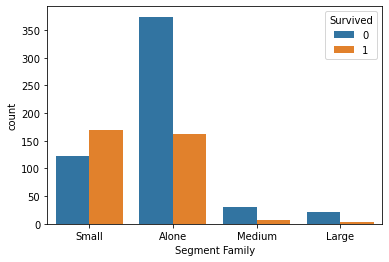

In [20]:
sns.countplot(df["Segment Family"], hue=df["Survived"])

##### Title

Title of Passengers such as Mr, Mrs, and others are useful for us to know whether it has a relation with survival chance or not.

In [21]:
df["Title"] = df["Name"].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

In [22]:
df["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [23]:
df["Title"] = df["Title"].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
df["Title"] = df["Title"].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

In [24]:
df["Title"].value_counts()

Mr                          517
Miss/Mrs/Ms                 313
Master                       40
Dr/Military/Noble/Clergy     21
Name: Title, dtype: int64

In [25]:
title_total = df.groupby("Title").count()["PassengerId"]
title_perc = title_total/df.shape[0]*100
title_data = pd.concat([title_total, title_perc], axis=1, keys=['Total', '%']).sort_values(by='Total', ascending=False).reset_index()
title_data

,Title,Total,%
0,Mr,517,58.024691
1,Miss/Mrs/Ms,313,35.129068
2,Master,40,4.489338
3,Dr/Military/Noble/Clergy,21,2.356902


<AxesSubplot:xlabel='Title', ylabel='count'>

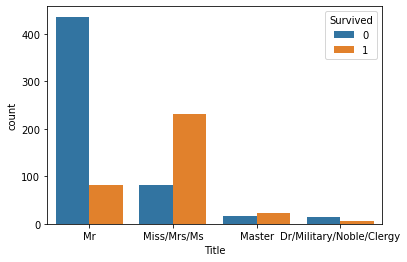

In [26]:
sns.countplot(df["Title"], hue=df["Survived"])

##### Ticket Frequency

Many passengers traveled in groups. Those groups consist of friends, nannies, maids and etc. They weren't counted as family, but they used the same ticket. So, grouping the tickets by their frequency could give us some insights.

In [27]:
df["Ticket Frequency"] = df.groupby("Ticket")["Ticket"].transform("count")

<AxesSubplot:xlabel='Ticket Frequency', ylabel='count'>

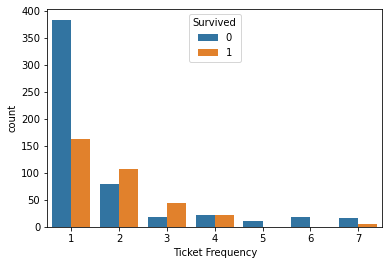

In [28]:
sns.countplot(df["Ticket Frequency"], hue=df["Survived"])

**Key Takeaways:**
* Passengers who traveled alone (without other family members) are dominated in this data, that is around 60% of passengers.
* Alone passengers had a bigger chance of not surviving compared to passengers who traveled with family. And the small size family which contains 2,3, or 4 family members, was the one and only family segment that has a survival chance bigger than the not-survived chance.
* Passengers with a "Mr" title mostly didn't survive, while the female passengers (passengers that have a "Miss/Mrs/Ms" title) had a high survival chance.
* Based on ticket frequency information, passengers who didn't travel in groups had a small survival chance.

### Data Preprocessing

##### Handling Missing Value

In [29]:
def missing_data(df):
    value = df.isnull().sum().sort_values(ascending=False)
    percent = df.isnull().sum()/df.shape[0]*100
    table_data = pd.concat([value, percent], axis=1, keys=['Value', '%'])
    return table_data

In [30]:
missing_data(df)

,Value,%
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


As we can see:
* `Cabin` has more than 77% missing values on its column, so it's better for us to drop the column.
* `Age` has around 20% missing values, and as we can see in the EDA step, the `Age` column nearly has a normal distribution, so we can fill the missing values using **mean**.
* `Embarked` is a categorical variable, so we need to fill the missing values with **mode**.
* Other columns have no missing values.

In [31]:
df.drop("Cabin", axis=1, inplace=True)

In [32]:
df["Age"] = df["Age"].fillna(np.ceil(df["Age"].mean()))

In [33]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [34]:
missing_data(df)

,Value,%
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,0,0.0


##### Handling Outliers

In this project, handling outliers will be done using Z-Score.

In [35]:
from scipy import stats

In [36]:
print(f'Total rows before handling outliers: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in num:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries
    
df = df[filtered_entries]

print(f'Total rows before handling outliers: {len(df)}')

Total rows before handling outliers: 891
Total rows before handling outliers: 864


##### Feature Encoding

In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family Size,Segment Family,Title,Ticket Frequency
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,Small,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,Small,Miss/Mrs/Ms,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Alone,Miss/Mrs/Ms,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,Small,Miss/Mrs/Ms,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,Alone,Mr,1


In [38]:
#df["Sex"] = df["Sex"].astype("category").cat.codes

In [39]:
df = pd.get_dummies(df, columns=["Pclass", "Sex", "Embarked", "Segment Family", "Title"], 
                    prefix=["pclass", "sex", "emb", "fml", "tlt"])

In [40]:
df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Family Size,Ticket Frequency,...,emb_Q,emb_S,fml_Alone,fml_Large,fml_Medium,fml_Small,tlt_Dr/Military/Noble/Clergy,tlt_Master,tlt_Miss/Mrs/Ms,tlt_Mr
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,2,1,...,0,1,0,0,0,1,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,2,1,...,0,0,0,0,0,1,0,0,1,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,1,...,0,1,1,0,0,0,0,0,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,2,2,...,0,1,0,0,0,1,0,0,1,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,1,...,0,1,1,0,0,0,0,0,0,1


##### Feature Selection

In [41]:
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Family Size', 'Ticket Frequency', 'pclass_1', 'pclass_2',
       'pclass_3', 'sex_female', 'sex_male', 'emb_C', 'emb_Q', 'emb_S',
       'fml_Alone', 'fml_Large', 'fml_Medium', 'fml_Small',
       'tlt_Dr/Military/Noble/Clergy', 'tlt_Master', 'tlt_Miss/Mrs/Ms',
       'tlt_Mr'],
      dtype='object')

In [42]:
df_model = df.drop(columns = ["PassengerId", "Name", "SibSp", "Parch", "Ticket"])

In [43]:
df_model

,Survived,Age,Fare,Family Size,Ticket Frequency,pclass_1,pclass_2,pclass_3,sex_female,sex_male,...,emb_Q,emb_S,fml_Alone,fml_Large,fml_Medium,fml_Small,tlt_Dr/Military/Noble/Clergy,tlt_Master,tlt_Miss/Mrs/Ms,tlt_Mr
0,0,22.0,7.2500,2,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
1,1,38.0,71.2833,2,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,1,26.0,7.9250,1,1,0,0,1,1,0,...,0,1,1,0,0,0,0,0,1,0
3,1,35.0,53.1000,2,2,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,35.0,8.0500,1,1,0,0,1,0,1,...,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,1,1,0,1,0,0,1,...,0,1,1,0,0,0,1,0,0,0
887,1,19.0,30.0000,1,1,1,0,0,1,0,...,0,1,1,0,0,0,0,0,1,0
888,0,30.0,23.4500,4,2,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
889,1,26.0,30.0000,1,1,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


### Modeling

In [44]:
!pip install plot_metric

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from plot_metric.functions import BinaryClassification

In [46]:
for i in ["Age", "Fare"]:
    df_model[i] = StandardScaler().fit_transform(df_model[i].values.reshape(len(df_model), 1))

df_model.describe()

,Survived,Age,Fare,Family Size,Ticket Frequency,pclass_1,pclass_2,pclass_3,sex_female,sex_male,...,emb_Q,emb_S,fml_Alone,fml_Large,fml_Medium,fml_Small,tlt_Dr/Military/Noble/Clergy,tlt_Master,tlt_Miss/Mrs/Ms,tlt_Mr
count,864.000000,8.640000e+02,8.640000e+02,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,...,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000
mean,0.378472,1.217519e-16,3.071103e-17,1.888889,1.765046,0.222222,0.211806,0.565972,0.349537,0.650463,...,0.087963,0.733796,0.606481,0.028935,0.035880,0.328704,0.023148,0.046296,0.348380,0.582176
std,0.485287,1.000579e+00,1.000579e+00,1.602914,1.359616,0.415981,0.408824,0.495916,0.477100,0.477100,...,0.283405,0.442228,0.488813,0.167721,0.186098,0.470014,0.150461,0.210248,0.476733,0.493487
min,0.000000,-2.319775e+00,-9.019002e-01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-5.913895e-01,-6.331817e-01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.934650e-02,-4.301880e-01,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,4.498065e-01,1.114349e-01,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,2.932658e+00,4.709022e+00,11.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
x = df_model.drop('Survived', axis=1)
y = df_model['Survived']

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 41)

##### Logistic Regression

In [49]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
ypred_lr = lr.predict(x_test)

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       107
           1       0.77      0.65      0.70        66

    accuracy                           0.79       173
   macro avg       0.79      0.77      0.77       173
weighted avg       0.79      0.79      0.79       173



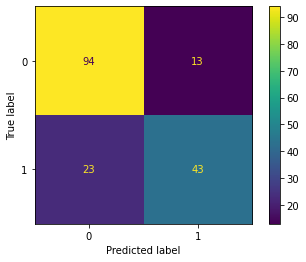

In [50]:
plot_confusion_matrix(lr, x_test, y_test)
print(classification_report(y_test, ypred_lr))
plt.grid(False)

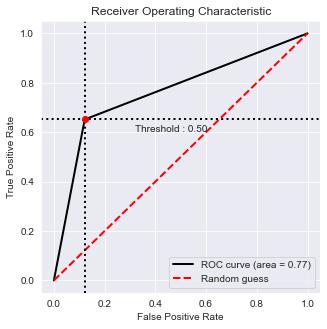

In [51]:
bc1 = BinaryClassification(y_test, ypred_lr, labels=["Class 0", "Class 1"])
plt.figure(figsize=(5,5))
bc1.plot_roc_curve()
plt.show()

##### Random Forest

In [52]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
ypred_rf = rf.predict(x_test)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       107
           1       0.74      0.76      0.75        66

    accuracy                           0.80       173
   macro avg       0.79      0.79      0.79       173
weighted avg       0.80      0.80      0.80       173



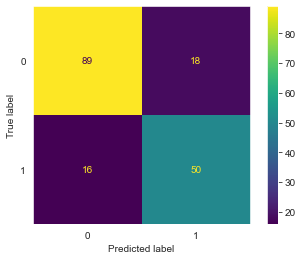

In [53]:
plot_confusion_matrix(rf, x_test, y_test)
print(classification_report(y_test, ypred_rf))
plt.grid(False)

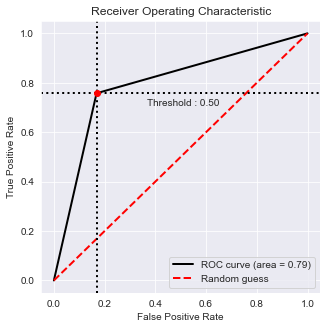

In [54]:
bc2 = BinaryClassification(y_test, ypred_rf, labels=["Class 0", "Class 1"])
plt.figure(figsize=(5,5))
bc2.plot_roc_curve()
plt.show()

##### SVM

In [55]:
svm = SVC()
svm.fit(x_train,y_train)
ypred_svm = svm.predict(x_test)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       107
           1       0.74      0.76      0.75        66

    accuracy                           0.80       173
   macro avg       0.79      0.79      0.79       173
weighted avg       0.80      0.80      0.80       173



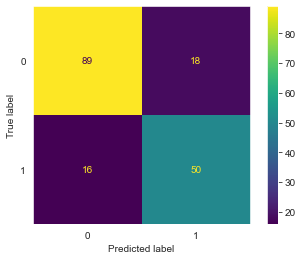

In [56]:
plot_confusion_matrix(rf, x_test, y_test)
print(classification_report(y_test, ypred_rf))
plt.grid(False)

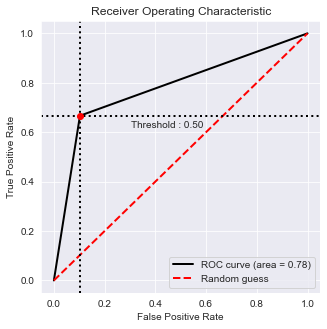

In [57]:
bc3 = BinaryClassification(y_test, ypred_svm, labels=["Class 0", "Class 1"])
plt.figure(figsize=(5,5))
bc3.plot_roc_curve()
plt.show()

### Hyperparameter Tuning

In [58]:
from sklearn.model_selection import GridSearchCV

##### Logistic Regression

In [59]:
lr_tuning = LogisticRegression(random_state=41)
param_lr = {'C' : np.arange(1,9,1),
            'penalty' : ['l1', 'l2', 'elasticnet'],
            'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'multi_class' : ['auto', 'ovr', 'multinomial'],
            'n_jobs' : [-1]
}
grid_lr = GridSearchCV(lr_tuning, param_lr, cv=5, return_train_score=False)
grid_lr.fit(x_train, y_train)
grid_lr.best_estimator_

LogisticRegression(C=3, multi_class='multinomial', n_jobs=-1, random_state=41,
                   solver='newton-cg')

In [60]:
new_lr = LogisticRegression(C=3, multi_class='multinomial', n_jobs=-1, random_state=41, solver='newton-cg')
new_lr.fit(x_train, y_train)
new_ypred_lr = new_lr.predict(x_test)

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       107
           1       0.77      0.65      0.70        66

    accuracy                           0.79       173
   macro avg       0.79      0.77      0.77       173
weighted avg       0.79      0.79      0.79       173



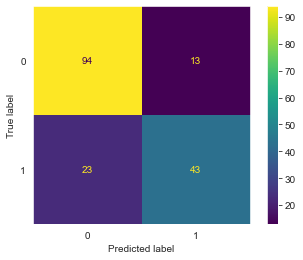

In [61]:
plot_confusion_matrix(new_lr, x_test, y_test)
print(classification_report(y_test, new_ypred_lr))
plt.grid(False)

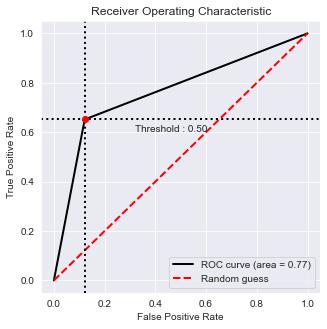

In [62]:
bc4 = BinaryClassification(y_test, new_ypred_lr, labels=["Class 0", "Class 1"])
plt.figure(figsize=(5,5))
bc4.plot_roc_curve()
plt.show()

##### Random Forest

In [63]:
rf_tuning = RandomForestClassifier(random_state=41)
param_rf = {'n_estimators': [i for i in range(10,100,5)],
            'criterion' : ['gini', 'entropy'],
            'max_features' : ['auto', 'sqrt', 'log2'],
            'n_jobs' : [-1]
}
grid_rf = GridSearchCV(rf_tuning, param_rf, cv=5, return_train_score=False)
grid_rf.fit(x_train, y_train)
grid_rf.best_estimator_

RandomForestClassifier(max_features='auto', n_estimators=10, n_jobs=-1,
                       random_state=41)

In [64]:
new_rf = RandomForestClassifier(max_features='auto', n_estimators=10, n_jobs=-1, random_state=41)
new_rf.fit(x_train, y_train)
new_ypred_rf = new_rf.predict(x_test)

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       107
           1       0.73      0.71      0.72        66

    accuracy                           0.79       173
   macro avg       0.78      0.78      0.78       173
weighted avg       0.79      0.79      0.79       173



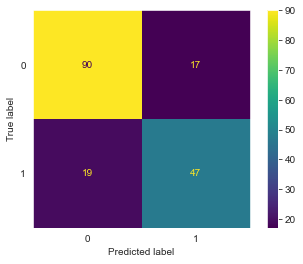

In [65]:
plot_confusion_matrix(new_rf, x_test, y_test)
print(classification_report(y_test, new_ypred_rf))
plt.grid(False)

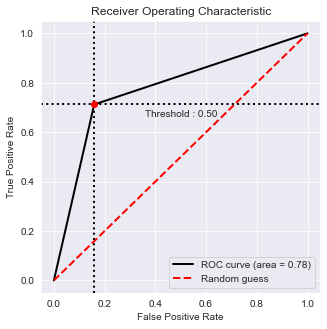

In [66]:
bc5 = BinaryClassification(y_test, new_ypred_rf, labels=["Class 0", "Class 1"])
plt.figure(figsize=(5,5))
bc5.plot_roc_curve()
plt.show()

##### SVM

In [67]:
svm_tuning = SVC(random_state=41)
param_svm = {'C': np.arange(1,9,1), 
             'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']
}
grid_svm = GridSearchCV(svm_tuning, param_svm, cv=5, return_train_score=False)
grid_svm.fit(x_train, y_train)
grid_svm.best_estimator_

SVC(C=1, kernel='poly', random_state=41)

In [68]:
new_svm = SVC(C=1, kernel='poly', random_state=41)
new_svm.fit(x_train, y_train)
new_ypred_svm = new_svm.predict(x_test)

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       107
           1       0.80      0.65      0.72        66

    accuracy                           0.80       173
   macro avg       0.80      0.77      0.78       173
weighted avg       0.80      0.80      0.80       173



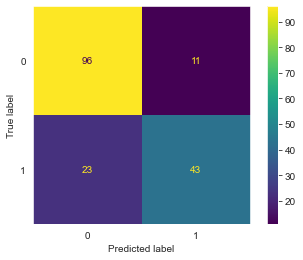

In [69]:
from sklearn.metrics import classification_report, confusion_matrix

plot_confusion_matrix(new_svm, x_test, y_test)
print(classification_report(y_test, new_ypred_svm))
plt.grid(False)

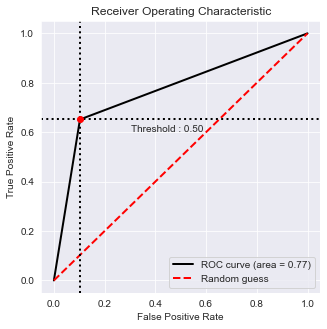

In [70]:
bc6 = BinaryClassification(y_test, new_ypred_svm, labels=["Class 0", "Class 1"])
plt.figure(figsize=(5,5))
bc6.plot_roc_curve()
plt.show()

##### Model Evaluation Result

* For the Titanic dataset, it can be said that the data is nearly balanced, so the metric that is most important to be seen here is **accuracy** metric. Based on modeling that we've done, the **SVM model with hyperparameter tuning** has the best accuracy, which is **80% accuracy score**.
* Another metric that should be noticed here is **recall** metric. As we know that it is dangerous if Machine Learning predicts passengers don't survive while in reality, the passengers survive. This false prediction could affect the decision of whether the rescuer team needs to help them or not. So, we need to choose the model with the False Negative value as small as possible, and it is can be seen by recall metric. The higher the recall metric, then it has smaller False Negative value. Of all the model we've done, the **SVM model with hyperparameter tuning** has the **highest recall value with 0.90**.
* The conclusion for this modeling is that the **SVM model with C=1, kernel=poly, and random state=41** is the best model with the highest prediction accuracy and smallest value of False Negative.

##### Feature Importance in Logistic Regression Model

In [71]:
def logreg_feature_importance(model):
    importance = model.coef_[0]
    col = list(df_model.columns)
    del col[0]
    df_imp = pd.DataFrame({'Columns' : col, 'Importance' : importance})
    
    def mutlak(x):
        if x['Importance'] <0:
            return x['Importance']*-1
        else:
            return x['Importance']
    
    df_imp['Value'] = df_imp.apply(lambda x: mutlak(x), axis=1)
        
    df_imp.sort_values(by='Value')[['Columns', 'Value']].set_index('Columns').plot.barh()

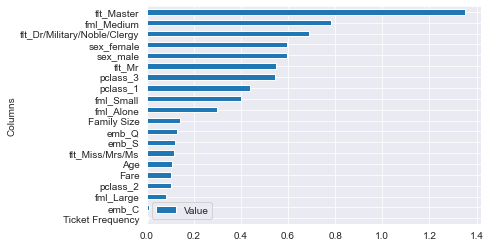

In [72]:
logreg_feature_importance(new_lr)

##### Feature Importance in Random Forest Model

In [73]:
def rf_feature_importance(model):
    importance = model.feature_importances_
    col = list(df_model.columns)
    del col[0]
    df_imp = pd.DataFrame({'Columns' : col, 'Importance' : importance})
    
    def mutlak(x):
        if x['Importance'] <0:
            return x['Importance']*-1
        else:
            return x['Importance']
    
    df_imp['Value'] = df_imp.apply(lambda x: mutlak(x), axis=1)
        
    df_imp.sort_values(by='Value')[['Columns', 'Value']].set_index('Columns').plot.barh()

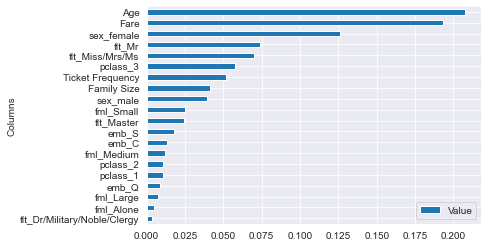

In [74]:
rf_feature_importance(new_rf)

**Key Takeaways:**
* In Logistic Regression Model, title and sex of passengers are the most important feature to see whether the passengers could survive or not.
* While in the Random Forest Model, age and fare are the two most important feature.